> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No show appointments dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
    %matplotlib inline
    import pandas as pd
    import matplotlib.pyplot as plt 
   # % matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
    #import warnings
    import warnings 
    warnings.filterwarnings('ignore')


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv');
# Get first rows to see data
df.head() 
    

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
print("Shape of dataset : ",df.shape)
print("===============================================")
print("Number of duplicates: " , df.duplicated().sum())

Shape of dataset :  (110527, 14)
Number of duplicates:  0


In [6]:
#Using unique function to see values all unique values of  some columns
print("Alcoholism unique values:" ,df['Alcoholism'].unique())
print("Diabetes unique values:" ,df['Diabetes'].unique())
df.tail(5)


Alcoholism unique values: [0 1]
Diabetes unique values: [0 1]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Changing datatypes of come columns!) 
### Since there are no duplicates or null data 
### Change datatype of ScheduledDay to date not string 
###  Change datatype of AppointmentDay to date not string
### Change datatype of PatientId to int64

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#Change datatype of day to date not string 
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
#Change patientid into integer 
df.astype({'PatientId': 'int64'}).dtypes
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Who are more exposed to Diabetes Females or Males)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000165F7E43B00>,
      dtype=object)

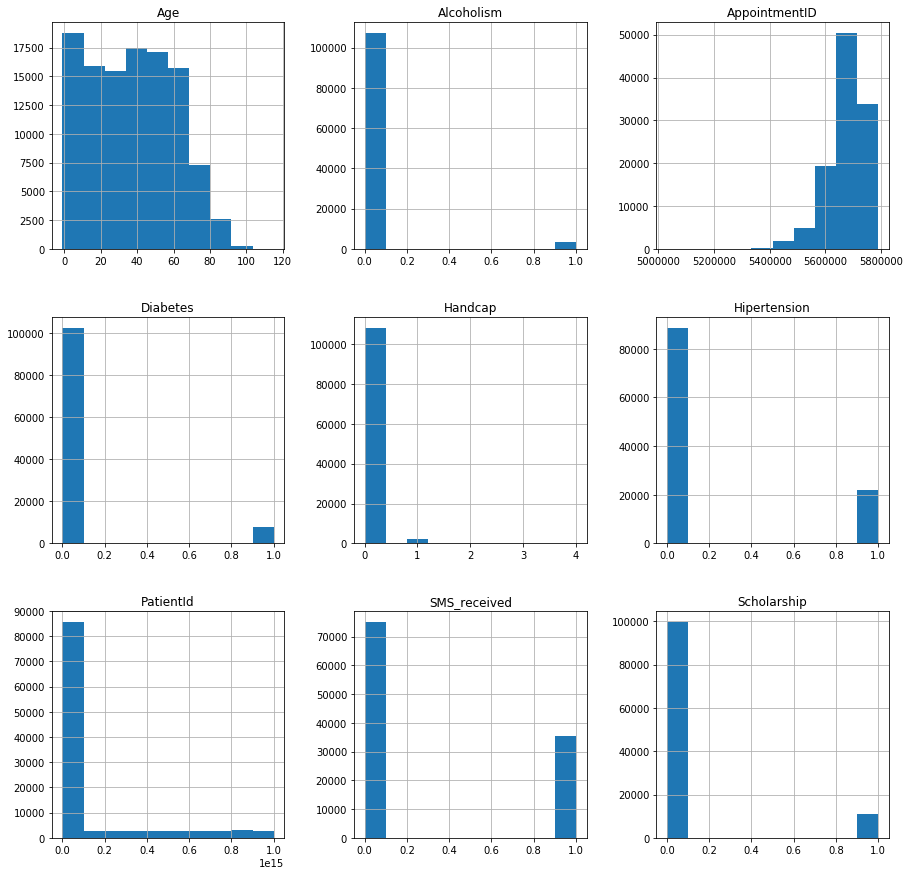

In [8]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(15,15))

# Males and Females who have diabetes

0    36350
1     2337
Name: Diabetes, dtype: int64


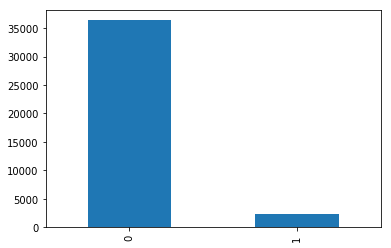

In [9]:
df_male=df[df['Gender']=="M"]
df_female=df[df['Gender']=="F"]
df_male['Diabetes'].value_counts().plot(kind='bar')
print(df_male['Diabetes'].value_counts())

#  Females can be more exposed to Diabetes than Males

In [10]:
df_female_diabetes=df_female[df_female['Diabetes']==1]
print(df_female['Diabetes'].value_counts())
print("Number of females that have diabetes: " ,df_female_diabetes['Diabetes'].sum())
print("Females can be more exposed to Diabetes than Males ")

0    66234
1     5606
Name: Diabetes, dtype: int64
Number of females that have diabetes:  5606
Females can be more exposed to Diabetes than Males 


### Research Question 2  (Females who have Diabetes are more to show up or not and also for males Males who have Diabetes are more to show up or not and also for males)


# Females who have diabetes mostly  show up

Percentage of females who have diabetes and  show up or don't show up :  No     81.858723
Yes    18.141277
Name: No-show, dtype: float64
Females who have diabetes mostly  show up 


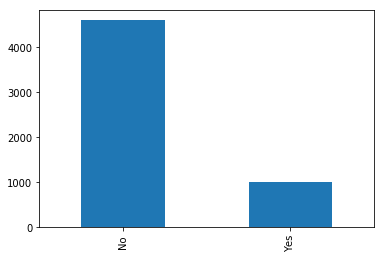

In [11]:
print("Percentage of females who have diabetes and  show up or don't show up : ",df_female_diabetes['No-show'].value_counts(normalize=True)*100)
df_female_diabetes['No-show'].value_counts().plot(kind='bar',y='No-show')
print("Females who have diabetes mostly  show up ");

# Males who have diabetes mostly show up 

Percentage of males who have diabetes and  show up or don't show up :  No     82.327771
Yes    17.672229
Name: No-show, dtype: float64
Males who have diabetes mostly show up 


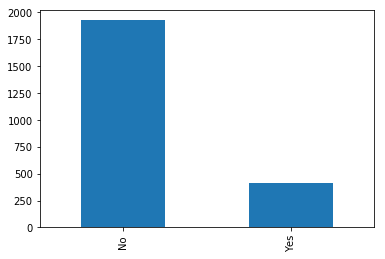

In [12]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_male_diabetes=df_male[df_male['Diabetes']==1]
print("Percentage of males who have diabetes and  show up or don't show up : ",df_male_diabetes['No-show'].value_counts(normalize=True)*100)
df_male_diabetes['No-show'].value_counts().plot(kind='bar',y='No-show')
print("Males who have diabetes mostly show up ");

# Patients who suffer from Alcoholism mostly show up

Number of patients who suffer from Alcoholism that show up or not:  No     2683
Yes     677
Name: No-show, dtype: int64
Percentage of patients  that suffer from alcoholism and show up or don't show up :  No     82.327771
Yes    17.672229
Name: No-show, dtype: float64
Patients who suffer from Alcoholism mostly show up 


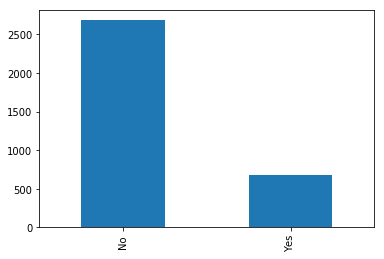

In [13]:
df_alcoholed=df[df['Alcoholism'] == 1]
df_not_alcoholed=df[df['Alcoholism'] == 0]
print("Number of patients who suffer from Alcoholism that show up or not: " , df_alcoholed['No-show'].value_counts())
df_alcoholed['No-show'].value_counts().plot(kind='bar')
print("Percentage of patients  that suffer from alcoholism and show up or don't show up : ",df_male_diabetes['No-show'].value_counts(normalize=True)*100)
print("Patients who suffer from Alcoholism mostly show up ");

## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

# Patients who suffer from Alcoholism mostly show up 
# Females who have diabetes mostly  show up
# Males who have diabetes mostly  show up
# Females can be more exposed to Diabetes than Males

In [14]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0